In [39]:
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
np.random.seed(2)

X = np.random.rand(1000, 1)
y = 4 + 3 * X + .2*np.random.randn(1000, 1)

one = np.ones((X.shape[0],1))
Xbar = np.concatenate((one, X), axis = 1)

A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w_exact = np.dot(np.linalg.pinv(A), b)


def cost(w):
    return .5/Xbar.shape[0]*np.linalg.norm(y - Xbar.dot(w), 2)**2;

def grad(w):
    return 1/Xbar.shape[0] * Xbar.T.dot(Xbar.dot(w) - y)


def numerical_grad(w, cost):
    eps = 1e-4
    g = np.zeros_like(w)
    for i in range(len(w)):
        w_p = w.copy()
        w_n = w.copy()
        w_p[i] += eps 
        w_n[i] -= eps
        g[i] = (cost(w_p) - cost(w_n))/(2*eps)
    return g 

def check_grad(w, cost, grad):
    w = np.random.rand(w.shape[0], w.shape[1])
    grad1 = grad(w)
    grad2 = numerical_grad(w, cost)
    if np.linalg.norm(grad1 - grad2) < 1e-6:
        return True
    else:
        False
print( 'Checking gradient: ', check_grad(np.random.rand(2, 1), cost, grad))

Checking gradient:  True


In [40]:
def GD_momentum(w_init, grad, eta, gamma):
    w = [w_init]
    v = [np.zeros_like(w_init)]
    for it in range(100):
        v_new = gamma*v[-1] + eta*grad(w[-1])
        w_new = w[-1] - v_new
        if np.linalg.norm(grad(w_new))/len(w_new) < 1e-3:
            break
        w.append(w_new)
        v.append(v_new)
    return (w, it)
w_init = np.array([[2], [1]])
(w_momentum, it_momentum) = GD_momentum(w_init, grad, .5, 0.9)

In [41]:
N = X.shape[0]
A = np.linalg.norm(y, 2)**2/N
B = 2*np.sum(X)/N
C = np.linalg.norm(X, 2)**2/N
D = -2*np.sum(y)/N 
E = -2*X.T.dot(y)/N

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

delta = 0.025
xg = np.arange(1.5, 7.0, delta)
yg = np.arange(0.5, 4.5, delta)
Xg, Yg = np.meshgrid(xg, yg)
Z = A + Xg**2 +B*Xg*Yg + C*Yg**2 + D*Xg + E*Yg

MovieWriter imagemagick unavailable; using Pillow instead.


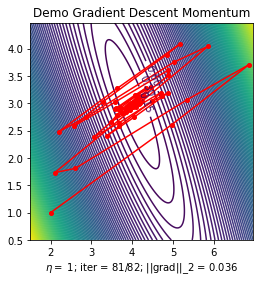

In [42]:
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
def save_gif(eta, gamma):
    (w, it) = GD_momentum(w_init, grad, eta, gamma)
    fig, ax = plt.subplots(figsize=(4,4))    
    plt.cla()
    plt.axis([1.5, 7, 0.5, 4.5])
    
    def update(ii):
        if ii == 0:
            plt.cla()
            CS = plt.contour(Xg, Yg, Z, 100)
            manual_locations = [(4.5, 3.5), (4.2, 3), (4.3, 3.3)]
            animlist = plt.clabel(CS, inline=.1, fontsize=10, manual=manual_locations)
            animlist = plt.title('Demo Gradient Descent Momentum')
            plt.plot(w_exact[0], w_exact[1], 'go')
        else:
            animlist = plt.plot([w[ii-1][0], w[ii][0]], [w[ii-1][1], w[ii][1]], 'r-')
        animlist = plt.plot(w[ii][0], w[ii][1], 'ro', markersize = 4) 
        xlabel = '$\eta =$ ' + str(eta) + '; iter = %d/%d' %(ii, it)
        xlabel += '; ||grad||_2 = %.3f' % np.linalg.norm(grad(w[ii]))
        ax.set_xlabel(xlabel)
        return animlist, ax
       
    anim = FuncAnimation(fig, update, frames=np.arange(0, it), interval=200)
    save_gif = '21_Phan_Thi_Thao_Ngan_Ch5_GD(1)'
    anim.save(save_gif, dpi=100, writer='imagemagick')

eta = 1 
gamma = .9
save_gif(eta, gamma)
# save_gif2(.1)
# save_gif2(2)

## Nesterov accelerated gradient (NAG) 

MovieWriter imagemagick unavailable; using Pillow instead.


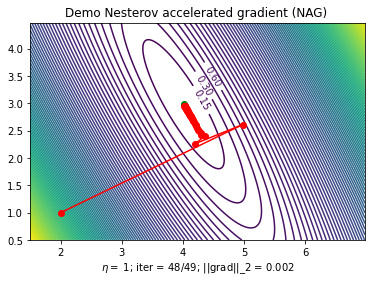

In [44]:
def GD(w_init, grad, eta):
    w = [w_init]
    for it in range(100):
        w_new = w[-1] - eta*grad(w[-1])
        if np.linalg.norm(grad(w_new))/len(w_new) < 1e-3:
            break
        w.append(w_new)
    return (w, it)
def save_gif2(eta):
    (w, it) = myGD(w_init, grad, eta)
    fig, ax = plt.subplots(figsize=(6,4))
    plt.cla()
    plt.axis([1.5, 6, 0.5, 4.5])

    def update(ii):
        if ii == 0:
            plt.cla()
            CS = plt.contour(Xg, Yg, Z, 100)
            manual_locations = [(4.5, 3.5), (4.2, 3), (4.3, 3.3)]
            animlist = plt.clabel(CS, inline=.1, fontsize=10, manual=manual_locations)
            animlist = plt.title('Demo Nesterov accelerated gradient (NAG) ')
            plt.plot(w_exact[0], w_exact[1], 'go')
        else:
            animlist = plt.plot([w[ii-1][0], w[ii][0]], [w[ii-1][1], w[ii][1]], 'r-')
        animlist = plt.plot(w[ii][0], w[ii][1], 'ro')
        xlabel = '$\eta =$ ' + str(eta) + '; iter = %d/%d' %(ii, it)
        xlabel += '; ||grad||_2 = %.3f' % np.linalg.norm(grad(w[ii]))
        ax.set_xlabel(xlabel)
        return animlist, ax

    anim1 = FuncAnimation(fig, update, frames=np.arange(0, it), interval=200)
    fn = '21_Phan_Thi_Thao_Ngan_Ch5_GD(2)'
    anim1.save(fn, dpi=100, writer='imagemagick')

save_gif2(1)